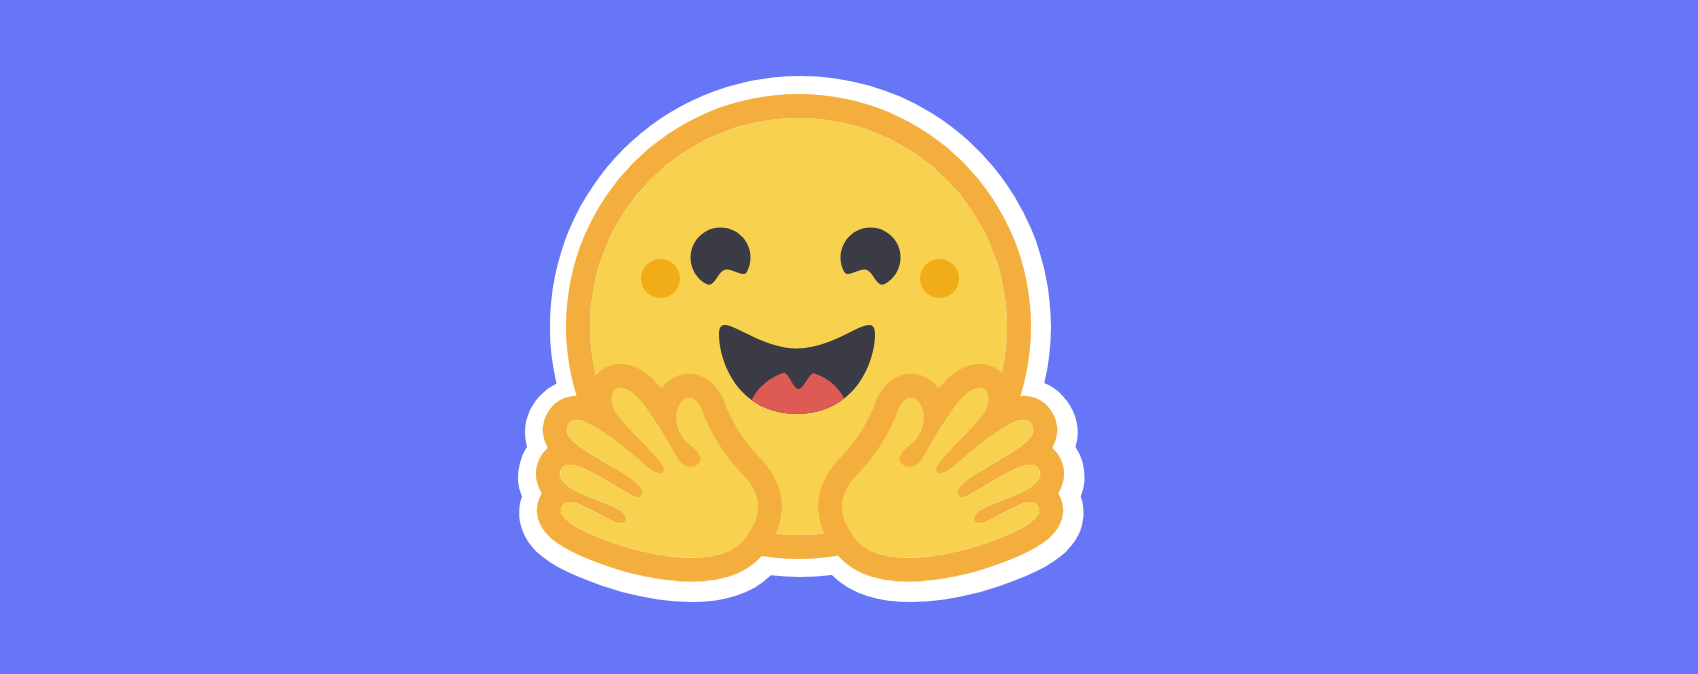





# Using Hugging Face

State-of-the-art Natural Language Processing for PyTorch and TensorFlow 2.0

🤗 Transformers provides thousands of pretrained models to perform tasks on texts such as classification, information extraction, question answering, summarization, translation, text generation, etc in 100+ languages. Its aim is to make cutting-edge NLP easier to use for everyone.

🤗 Transformers provides APIs to quickly download and use those pretrained models on a given text, fine-tune them on your own datasets then share them with the community on our model hub. At the same time, each python module defining an architecture can be used as a standalone and modified to enable quick research experiments.

🤗 Transformers is backed by the two most popular deep learning libraries, PyTorch and TensorFlow, with a seamless integration between them, allowing you to train your models with one then load it for inference with the other.

In [2]:
!pip install transformers

     |████████████████████████████████| 1.8MB 9.4MB/s 
     |████████████████████████████████| 890kB 47.4MB/s 
     |████████████████████████████████| 3.2MB 25.8MB/s 
  Created wheel for sacremoses: filename=sacremoses-0.0.43-cp36-none-any.whl size=893261 sha256=018f0b743bb907abfbb4a7ddf74cac7d74282f2ab4ed7dc980b8317facf28f97
  Stored in directory: /root/.cache/pip/wheels/29/3c/fd/7ce5c3f0666dab31a50123635e6fb5e19ceb42ce38d4e58f45
Successfully built sacremoses


# Pipeline

In [3]:
from transformers import pipeline

## Sentiment Analysis

In [ ]:
nlp = pipeline('sentiment-analysis')
nlp('We are very happy to include pipeline into the transformers repository.')

[{'label': 'POSITIVE', 'score': 0.9978193640708923}]

## Question Answering

In [ ]:
nlp = pipeline('question-answering')
nlp({
    'question': 'What is my name ?',
    'context': 'My name is Gagan, I work at Google'
})

{'answer': 'Gagan', 'end': 16, 'score': 0.9914252161979675, 'start': 11}

## Mask Fill

In [ ]:
unmasker = pipeline('fill-mask', model='bert-base-uncased')
unmasker("Hello I'm a [MASK] model.")

Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForMaskedLM: ['cls.seq_relationship.weight', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


[{'score': 0.10731077939271927,
  'sequence': "hello i'm a fashion model.",
  'token': 4827,
  'token_str': 'fashion'},
 {'score': 0.08774469047784805,
  'sequence': "hello i'm a role model.",
  'token': 2535,
  'token_str': 'role'},
 {'score': 0.053383756428956985,
  'sequence': "hello i'm a new model.",
  'token': 2047,
  'token_str': 'new'},
 {'score': 0.0466720387339592,
  'sequence': "hello i'm a super model.",
  'token': 3565,
  'token_str': 'super'},
 {'score': 0.02709590084850788,
  'sequence': "hello i'm a fine model.",
  'token': 2986,
  'token_str': 'fine'}]

In [ ]:
nlp = pipeline('fill-mask')
nlp('I hope you <mask> this video')

[{'score': 0.7073914408683777,
  'sequence': 'I hope you enjoyed this video',
  'token': 3776,
  'token_str': ' enjoyed'},
 {'score': 0.13673578202724457,
  'sequence': 'I hope you enjoy this video',
  'token': 2254,
  'token_str': ' enjoy'},
 {'score': 0.1335313767194748,
  'sequence': 'I hope you liked this video',
  'token': 6640,
  'token_str': ' liked'},
 {'score': 0.0057791294530034065,
  'sequence': 'I hope you like this video',
  'token': 101,
  'token_str': ' like'},
 {'score': 0.005615198519080877,
  'sequence': 'I hope you appreciated this video',
  'token': 10874,
  'token_str': ' appreciated'}]

## NER (Named-entity recognition)


In [ ]:
nlp = pipeline('ner')
nlp('It is me, Gagan, I work at DSC')

[{'end': 14,
  'entity': 'I-PER',
  'index': 5,
  'score': 0.994879424571991,
  'start': 10,
  'word': 'Gaga'},
 {'end': 15,
  'entity': 'I-PER',
  'index': 6,
  'score': 0.9487237930297852,
  'start': 14,
  'word': '##n'},
 {'end': 29,
  'entity': 'I-ORG',
  'index': 11,
  'score': 0.9993436932563782,
  'start': 27,
  'word': 'DS'},
 {'end': 30,
  'entity': 'I-ORG',
  'index': 12,
  'score': 0.9922718405723572,
  'start': 29,
  'word': '##C'}]

In [ ]:
nlp.model.save_pretrained('...')

# Text Generation (GPT-2)

In [4]:
gpt2 = pipeline('text-generation')

Some weights of GPT2Model were not initialized from the model checkpoint at gpt2 and are newly initialized: ['h.0.attn.masked_bias', 'h.1.attn.masked_bias', 'h.2.attn.masked_bias', 'h.3.attn.masked_bias', 'h.4.attn.masked_bias', 'h.5.attn.masked_bias', 'h.6.attn.masked_bias', 'h.7.attn.masked_bias', 'h.8.attn.masked_bias', 'h.9.attn.masked_bias', 'h.10.attn.masked_bias', 'h.11.attn.masked_bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [5]:
gpt2('Natural language processing is amazing!')

Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


[{'generated_text': "Natural language processing is amazing! I hope you learned anything you can from this tutorial.\n\nThere's also a great link to the video which can be played in the new Youtube Video app, on iOS 9 you can also watch it here on iTunes"}]

## Single Word Prediction 

In [ ]:
import torch
from transformers import GPT2Tokenizer, GPT2LMHeadModel

In [ ]:
tokeniser = GPT2Tokenizer.from_pretrained('gpt2')
model = GPT2LMHeadModel.from_pretrained('gpt2')

In [ ]:
text = "let us see how this turns"
indexed_tokens = tokeniser.encode(text)
tokens_tensor = torch.tensor([indexed_tokens])
model.eval()
tokens_tensor = tokens_tensor.to('cuda')
model.to('cuda')

GPT2LMHeadModel(
  (transformer): GPT2Model(
    (wte): Embedding(50257, 768)
    (wpe): Embedding(1024, 768)
    (drop): Dropout(p=0.1, inplace=False)
    (h): ModuleList(
      (0): Block(
        (ln_1): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
        (attn): Attention(
          (c_attn): Conv1D()
          (c_proj): Conv1D()
          (attn_dropout): Dropout(p=0.1, inplace=False)
          (resid_dropout): Dropout(p=0.1, inplace=False)
        )
        (ln_2): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
        (mlp): MLP(
          (c_fc): Conv1D()
          (c_proj): Conv1D()
          (dropout): Dropout(p=0.1, inplace=False)
        )
      )
      (1): Block(
        (ln_1): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
        (attn): Attention(
          (c_attn): Conv1D()
          (c_proj): Conv1D()
          (attn_dropout): Dropout(p=0.1, inplace=False)
          (resid_dropout): Dropout(p=0.1, inplace=False)
        )
        (ln_2): Laye

In [ ]:
with torch.no_grad():
  outputs = model(tokens_tensor)
  predictions = outputs[0]

print(outputs[0].shape)

predicted_index = torch.argmax(predictions[0, -1, :]).item()
predicted_text = tokeniser.decode(indexed_tokens + [predicted_index])

print(predicted_text)

torch.Size([1, 6, 50257])
let us see how this turns out


## Multi-word Generation 

In [ ]:
chars = 0
text = "i am very exited to present to you this"
while chars<50:
  chars += 1
  indexed_tokens = tokeniser.encode(text)
  tokens_tensors = torch.tensor([indexed_tokens])
  tokens_tensors = tokens_tensors.to('cuda')
#  model = model.to('cuda')
  with torch.no_grad():
    outputs = model(tokens_tensors)
    predictions = outputs[0]
  predicted_index = torch.argmax(predictions[0,-1,:]).item()
  text = tokeniser.decode(indexed_tokens + [predicted_index])

print(text)

i am very exited to present to you this new book. I am very excited to share with you the first chapter of the book, "The Secret of the Soul."


The Secret of the Soul is a book that I have been reading for over a year now. I have been


## Using Pytorch Libraries for GPT-2

In [ ]:
!git clone https://github.com/huggingface/pytorch-transformers.git

Cloning into 'pytorch-transformers'...
remote: Enumerating objects: 40, done.
remote: Counting objects: 100% (40/40), done.
remote: Compressing objects: 100% (31/31), done.
remote: Total 62391 (delta 15), reused 9 (delta 3), pack-reused 62351
Receiving objects: 100% (62391/62391), 47.56 MiB | 28.75 MiB/s, done.
Resolving deltas: 100% (44164/44164), done.


In [ ]:
!python pytorch-transformers/examples/text-generation/run_generation.py \
    --model_type=gpt2 \
    --length=100 \
    --model_name_or_path=gpt2 \

02/13/2021 18:49:30 - WARNING - __main__ -   device: cuda, n_gpu: 1, 16-bits training: False
02/13/2021 18:49:38 - INFO - __main__ -   Namespace(device=device(type='cuda'), fp16=False, k=0, length=100, model_name_or_path='gpt2', model_type='gpt2', n_gpu=1, no_cuda=False, num_return_sequences=1, p=0.9, padding_text='', prefix='', prompt='', repetition_penalty=1.0, seed=42, stop_token=None, temperature=1.0, xlm_language='')
Model prompt >>> i am very exited to present to you this
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
=== GENERATED SEQUENCE 1 ===
2021-02-13 18:49:59.473178: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.10.1
i am very exited to present to you this blend."

"It is really…tea," Angela corrected, brushing sheather lightly on her knee.

"Do you know who I am?" She asked, smiling faintly at the blonde. "Now I must say I've been close to Angela for a while now, and I think I owe 

# Text Summarisation 

In [7]:
text = 'Shakespeare occupies a position unique in world literature. Other poets, such as Homer and Dante, and novelists, such as Leo Tolstoy and Charles Dickens, have transcended national barriers, but no writer’s living reputation can compare to that of Shakespeare, whose plays, written in the late 16th and early 17th centuries for a small repertory theatre, are now performed and read more often and in more countries than ever before. The prophecy of his great contemporary, the poet and dramatist Ben Jonson, that Shakespeare “was not of an age, but for all time,” has been fulfilled. It may be audacious even to attempt a definition of his greatness, but it is not so difficult to describe the gifts that enabled him to create imaginative visions of pathos and mirth that, whether read or witnessed in the theatre, fill the mind and linger there. He is a writer of great intellectual rapidity, perceptiveness, and poetic power. Other writers have had these qualities, but with Shakespeare the keenness of mind was applied not to abstruse or remote subjects but to human beings and their complete range of emotions and conflicts. Other writers have applied their keenness of mind in this way, but Shakespeare is astonishingly clever with words and images, so that his mental energy, when applied to intelligible human situations, finds full and memorable expression, convincing and imaginatively stimulating. As if this were not enough, the art form into which his creative energies went was not remote and bookish but involved the vivid stage impersonation of human beings, commanding sympathy and inviting vicarious participation. Thus, Shakespeare’s merits can survive translation into other languages and into cultures remote from that of Elizabethan England.'
text

'Shakespeare occupies a position unique in world literature. Other poets, such as Homer and Dante, and novelists, such as Leo Tolstoy and Charles Dickens, have transcended national barriers, but no writer’s living reputation can compare to that of Shakespeare, whose plays, written in the late 16th and early 17th centuries for a small repertory theatre, are now performed and read more often and in more countries than ever before. The prophecy of his great contemporary, the poet and dramatist Ben Jonson, that Shakespeare “was not of an age, but for all time,” has been fulfilled. It may be audacious even to attempt a definition of his greatness, but it is not so difficult to describe the gifts that enabled him to create imaginative visions of pathos and mirth that, whether read or witnessed in the theatre, fill the mind and linger there. He is a writer of great intellectual rapidity, perceptiveness, and poetic power. Other writers have had these qualities, but with Shakespeare the keennes

In [9]:
summarizer = pipeline("summarization")

In [8]:
sum_op= (summarizer(text, max_length=50, min_length=30, do_sample=False))
sum_op

[{'summary_text': ' Shakespeare occupies a position unique in world literature . He is a writer of great intellectual rapidity, perceptiveness, and poetic power . Other writers have had these qualities, but with Shakespeare the keenness of mind was applied not to abstru'}]

In [ ]:
from transformers import BartTokenizer, BartForConditionalGeneration, BartConfig

model = BartForConditionalGeneration.from_pretrained('facebook/bart-large-cnn')
tokenizer = BartTokenizer.from_pretrained('facebook/bart-large-cnn')

In [ ]:
inputs = tokenizer.batch_encode_plus([text], max_length=1024, return_tensors='pt')

summary_ids = model.generate(inputs['input_ids'], num_beams=4, max_length=100, early_stopping=False)

for ids in summary_ids:
    short = tokenizer.decode(ids, skip_special_tokens=True, clean_up_tokenization_spaces=False)

    print(len(text), len(short))
    print(short)

Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.


1761 341
Shakespeare occupies a position unique in world literature. He is a writer of great intellectual rapidity, perceptiveness, and poetic power. Other writers have had these qualities, but with Shakespeare the keenness of mind was applied not to abstruse or remote subjects but to human beings and their complete range of emotions and conflicts.
